# Machine Learning Engineer Nanodegree
## Capstone

----
## Exploring the Data

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

In [5]:
# Load the Census dataset
prop_data = pd.read_csv('data/properties_2016.csv', header=0)
error_data = pd.read_csv('data/train_2016_v2.csv', header=0)

D:\program_files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# merge to train data set
train_data = error_data.merge(prop_data, on='parcelid', how='left')
for c in train_data.columns:
    if train_data[c].dtype == np.float64:
        train_data[c] = train_data[c].astype(np.float32)
train_data['sale_month'] = train_data['transactiondate'].apply(lambda x: x.split('-')[1])
train_data['sale_day'] = train_data['transactiondate'].apply(lambda x: x.split('-')[2])
train_data = train_data.drop('transactiondate', axis=1)
train_data.to_csv('data/train_data_merged.csv', index=False)

In [23]:
train_data = pd.read_csv('data/train_data_merged.csv', header=0)
print(train_data.shape)
display(train_data.iloc[:5, :].T)

(90275, 61)


,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
airconditioningtypeid,1,NaN,1,1,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4,4,NaN
calculatedbathnbr,2,3.5,3,2,2.5


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = sum(data['income'] == '>50K')

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = sum(data['income'] == '<=50K')  # quicker way would be to use n_records - n_greater, here just to verify the data is clean

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / float(n_records) * 100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

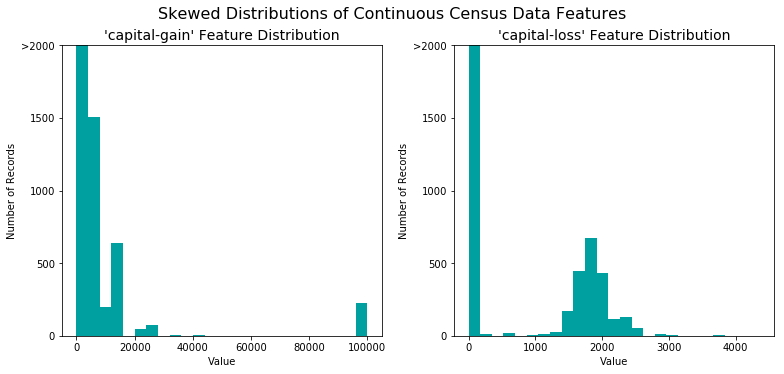

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

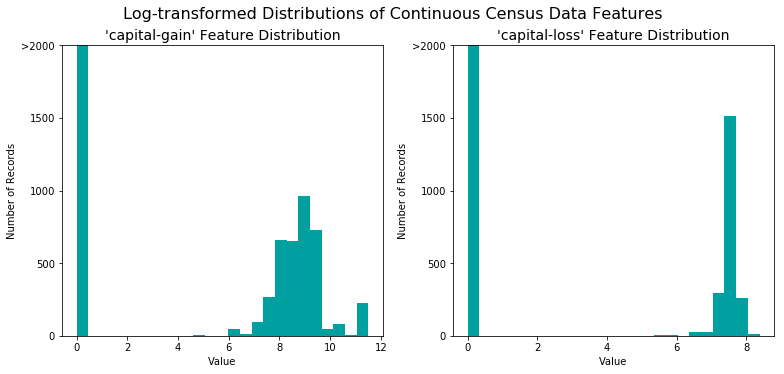

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
# income = income_raw.copy()
# income[income == '<=50K'] = 0
# income[income == '>50K'] = 1
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)
income = income.astype(int)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0, stratify=income)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [9]:
# TODO: Calculate accuracy
accuracy = sum(income) / float(len(income))

# TODO: Calculate F-score using the formula above for beta = 0.5
# with all samples being predicted positive, we have recall = 1.0
fscore = (1 + 0.5**2) * accuracy / ((0.5**2 * accuracy) + 1.0)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer:** 
*I would choose Random Forest, SVM and Logistic Regression.* 
- *GaussianNB is not ideal here as we have many categorical features, which cannot be used under Gaussian assumption.*
- *Although Ensemble Method cannot be used as a prediction model alone, it would be quite benificial to be used on top of any non-ensemble model. I choose Random Forest, which embedded Decision Tree as underlying model, so I would not try Decision Tree alone as another candidate.*
- *KNN, distance measurement with categorical features is not reasonable, thus again cannot use these features.*
- *SGD is not really a learning model, it is an optimization algo, and sklearn's SGDC's underlying learner is either SVM or logistic regression. Although it helps with partial-fit feature in case of too large dataset, apparently we don't have this problem here.* 

*Regarding the problem, there are some shared properties of all three methods I choose:*
- *They will not perform well when the class size in training data is highly inbalanced. In our problem, it is not ideally balanced, but not too bad.*
- *Our problem has both numerical and category independent variables, all three methods works well with that.*
- *Our problem cares more about predictive power than descriptive power, so models with less descriptive formation or output are not disadvantaged here.*

*Random Forest:*
- *Actually any real world application that uses Decision Tree can be extended to use Random Forest. While we have a lot of example of using Decision Trees, here is an explicit usage of Random Forest [Network Traffic Classification with Improved Random Forest](http://ieeexplore.ieee.org/document/7396257/).*
- *Advantages:*
    - *Single Tree can easily overfit when given too much representation power, Random Forest improves generalization power, while keeping the representation power.*
    - *Single Tree is unstable, as little variation of data could result in very different generated tree, but we do not need to worry about single tree's stability with Random Forest.*
    - *Using Tree can skip some common data preparation step like normalization, so is Random Forest.*
    - *Tree natrually handle both numerical and categorical data, so is Random Forest.*
    - *Tree is not sensitive to outliers, so is Random Forest.*
- *Disadvantages:*
    - *Single Tree is easy to understand, interpret and visualized, but a Random Forest is not.*
    - *Tree is not efficient in perspective of running time, Random Forest performs better when more trees are used, although can be parallelized, running time becomes more of an issue, which makes it impractical in some production cases.*
    - *Tree best fits to the case when TRUE decision boundaries in sub-areas are parallel to the axes, otherwise using tree to represents decision boundary is not efficient. Same problem with Random Forest.*
- *Random Forest will perform well when the TRUE decision boundary are parallel to the axes; and will not perform well otherwise.*
- *In our problem, We don't know the property of the TRUE decision boundary, axes-parallel type worth a try.* 

*SVM:*
- *Many people have tried SVM to do stock trading. [SVM for trading](https://inovancetech.com/how-to-trade-rsi.html)*
- *Advantages:*
	 - *Less prone to overfit by algo nature.*
	 - *Achieves global optimization.*
	 - *Effective in high dimentional spaces, can even work when number of dimensions is greater than number of samples.*
	 - *Have different Kernel functions to tune. And with different Kernal functions, it has high representation power to accomodate various types of decision boundaries in raw data.*
- *Disadvantages:*
	 - *Hard to interpret.*
	 - *Does not directly provide a probability estimates.*
	 - *Linear SVM does not provide good representation power, while kernal SVM is relatively inefficient to train.*
	 - *Too many hyper parameters and not easy to tune.*
- *Due to training inefficiency, when the problem scale is large and we have good-performing alternatives, it is not a good idea to have to use SVM.*
- *In our problem, the problem scale is not large, so it is not costy to give SVM a try.*

*Logistic Regression:*
- *One application of logistic regression is handwriting recognition. [Recognition of Similar Shaped Handwritten Characters Using Logistic Regression](http://ieeexplore.ieee.org/document/6195363/?reload=true)*
- *Advantages:*
    - *Output can be interpreted as probabilistic confidence.*
    - *Linear part is descriptive.*
    - *It is simple, thus less prone to overfitting.*
- *Disadvantages:*
    - *The other side of being simple is its limited representation power.*
- *Logistic regression works well when the TRUE decision boundary is a single line (no matter what direction it is in), and not otherwise.*
- *In our problem, logistic regression is simple and can act as a benchmark start point.*

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


F:\Program Files\Anaconda3\envs\udacityMLND\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


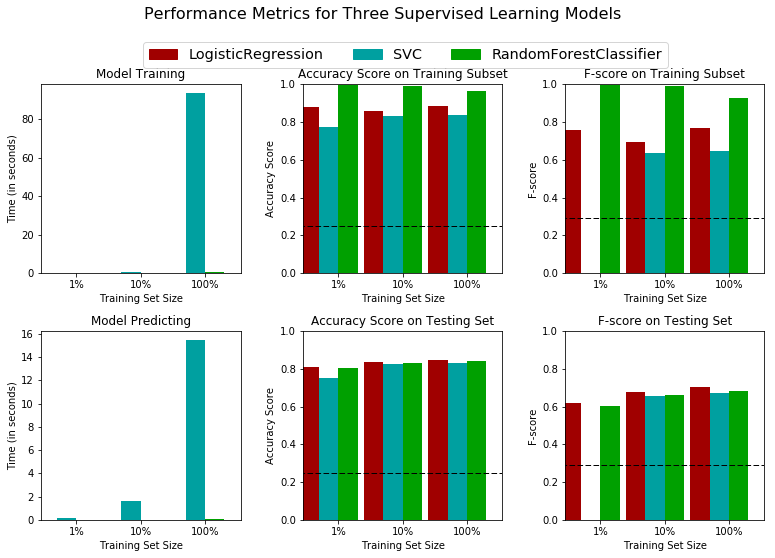

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# TODO: Initialize the three models
clf_A = RandomForestClassifier(random_state=7)
clf_B = LogisticRegression(random_state=7)
clf_C = SVC(random_state=7)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(y_train) * 0.01)
samples_10 = int(len(y_train) * 0.1)
samples_100 = int(len(y_train) * 1.0)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **
*Based on above results, I would choose Random Forest as the best candidate.*
- *SVM takes too long time to train. Considerting it does not provide a promising generalization power compared to others in default setting and it has too many hyper parameters to tune, devoting time to tune it does not seem efficient.*
- *From perspectives of time consumption and out-of-sample performance, default versions of Logistic Regression and Random Forest are very close to each other. However, from in-sample performance, we can see Random Forest has a much stronger representation power. Considering Random Forest has more dimensions to tune than Logistic Regression, we have good chance to transform that representation power to generalization power with careful tuning.*

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 

*Randome Forest is based on Decision Tree.*

*Decision Tree is a graph that uses a branching method to illustrate every possible outcome of a decision, where each 'branching' is splitting a group of samples by a filtering condition based on a certain feature, and decision is the label we predict for each resulted sub-group. Resulted sub-groups can be further splitted, and doing this iteratively will form a tree structure. Considering the following example, we want to predict whether we will have rain tomorrow based on today's weather. First, we branch the tree on whether pressure as 3pm today is larger than 1012 or not. If it is, we predict tomorrow as no rain; if it is not, we further branch it on whether today's sunshine index is larger or equal than 7.5 or not, if it is, we predict as no rain, and not otherwise.*

![tree.png](./tree_example.png)

*Random Forest is a collection of Decision Trees, each are trained with randomized subset of data, where subseting are performed in two dimensions: 1, random sampling a given number of instances from original sample (can be with or without replacement), 2, randomly choose a given number of subset of original features. While each tree could predict differently, a Random Forest makes a centralized opinion based on voting from all trees. For example, 3 trees of a Random Forest predict (True, False, False) respectively, the Random Forest will predict False as the final output. Random Forest makes less generalization error compared to a single tree, as when each tree makes mistakes in a different way, when combining the opinions, the mistakes can offset each other.*

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [18]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=7)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': (10, 50, 100), 'max_features': (5, 15, 20), 'min_samples_split': (2, 50, 100)}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8390
F-score on testing data: 0.6815

Optimized Model
------
Final accuracy score on the testing data: 0.8650
Final F-score on the testing data: 0.7452


In [19]:
print 'chosen n_estimators: %d' % best_clf.n_estimators
print 'chosen max_features: %d' % best_clf.max_features
print 'chosen min_samples_split: %d' % best_clf.min_samples_split

chosen n_estimators: 100
chosen max_features: 15
chosen min_samples_split: 50


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.2478             |       0.8390            |      0.8650           |
| F-score        |      0.2917               |      0.6815             |   0.7452       |


**Answer: **
*The stats above actually tells everything. Comparing stats of unoptimized model and naive model, using a model significantly improves the results than not. Comparing optimized model to unoptimized one, optimization helps. Although we don't see apprent improvement in accuracy, since we care more about precision than recall, F-score better reflects our concern, and we have noticable improvement in F-score by doing optimization than not.*

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

*If to use a more scientific way to measure contribution of features, I would, for each feature, go with Kolmogorov-Smirnov stats on distributions of data with different y label. But to just make a judgement intuitively, I would choose the 5 features, and rank from most important to least, as* 
- *education-num (or education_level)* 
- *occupation*
- *sex*
- *age*
- *hours-per-week*

*Reasons are quite narrative, ranking of importance is mostly intuition. The most important fact here is that the income threshold is not too high, so rules applicable to general population should apply here.*
- *Education should most statistically affects income, the more education received, the more likely to to make more than the threshold. And education level and number of education years contains almost the same information.* 
- *Then occupcation, put aside education level, income level of different occupation can make quite a difference.*
- *Then sex, no discrimination here, but in general reality, female makes less than male.*
- *Then age, everything else kept the same, it is a quite solid pattern that income increases with number of working years, so higher age should make higher income.*
- *Lastly hours-per-week, high-income works usually requires more devotion of time, also, people would be more willing to devote time to this kind of jobs.*

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

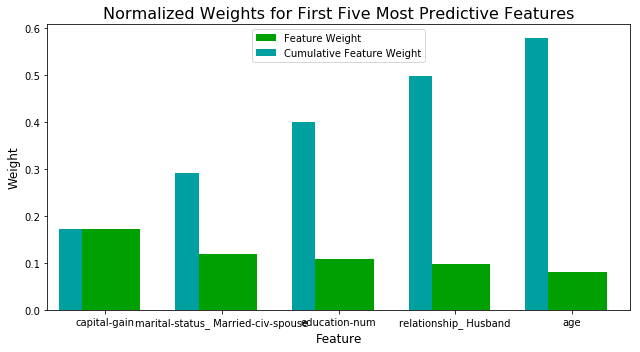

In [15]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 
model = best_clf

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

*Education and age are within my expectation, but capital-gain, marital-status and relationship are not. Given these results, and trying to think of an afterwards explaination, I might say:*
- *Capital gain reflects people's 'smartness' in making money, so they would tend to make more money in their official job.*
- *A stable marriage on one side provides a suitable environment to work well, on another, it calls for more responsibility, thus people will strive to make more.*
- *And within a marriage, the Husband bares more responsibility to make money.*

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [16]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
best_clf_clone = clone(best_clf)
best_clf_clone.max_features = 5
clf = best_clf_clone.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8650
F-score on testing data: 0.7452

Final Model trained on reduced data
------
Accuracy on testing data: 0.8440
F-score on testing data: 0.6962


In [17]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:20]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:20]]]

# Train on the "best" model found from grid search earlier
best_clf_clone = clone(best_clf)
best_clf_clone.max_features = 20
clf = best_clf_clone.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8650
F-score on testing data: 0.7452

Final Model trained on reduced data
------
Accuracy on testing data: 0.8616
F-score on testing data: 0.7369


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

*With my choice of 'best' model as Random Forest, it actually gets worse, F-score is hardly improved from un-optimized version. Even I expand the number of selected features to best candidate's max_features, it does not perform better than the original version. I guess this is because I used the same model to select feature and fit with feature. Moreover, for ensembling models, the key contribution to generalization is not from feature quality, but from ensembling algo itself. So in my case, I would not use reduced data. But I think feature selection would be benificial for non-ensembling methods, like logistic regression or SVM.*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.